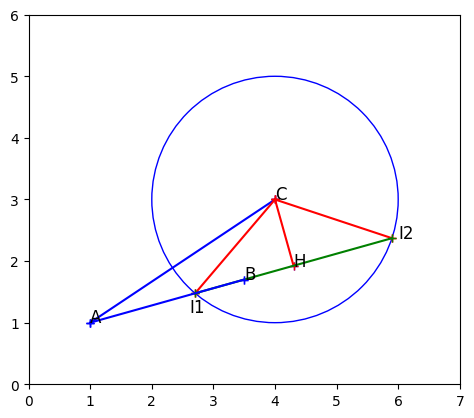

In [37]:
import math
from geom_types import Point,Circle

A=Point(1,1)
B=Point(3.5,1.7)
C=Circle(Point(4,3),2)

# compute unit vector for AB
dAB = math.hypot(B.x - A.x, B.y - A.y)
uABx = (B.x - A.x) / dAB
uABy = (B.y - A.y) / dAB

# find H as the projection of the center of the circle on (AB)
t = ( C.ctr.x - A.x ) * uABx + ( C.ctr.y - A.y ) * uABy
H = Point(
    A.x + t * uABx,
    A.y + t * uABy
)

# compute distance from center to H
dCH = math.hypot( H.x - C.ctr.x, H.y - C.ctr.y )
# compute angle for CH from X axis
aCH = math.atan2( H.y - C.ctr.y, H.x - C.ctr.x )

I1 = None
I2 = None
if dCH == C.r:
    # H is the single intersection point
    I1 = H
elif dCH < C.r:
    # 2 intersections points
    theta = math.acos( dCH / C.r )
    I1 = Point(
        C.ctr.x + C.r * math.cos( aCH - theta ),
        C.ctr.y + C.r * math.sin( aCH - theta )
    )
    I2 = Point(
        C.ctr.x + C.r * math.cos( aCH + theta ),
        C.ctr.y + C.r * math.sin( aCH + theta )
    )

#------------------------------------------------------------------
# plot circles and points
#------------------------------------------------------------------

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0.0, 7.0)
ax.set_ylim(0.0, 6.0)
ax.axis('scaled')

plt.plot(C.ctr.x, C.ctr.y, marker="+", color='b')
plt.text(C.ctr.x, C.ctr.y, "C", fontsize=12)
ax.add_patch(plt.Circle(C.ctr, C.r, color='b', fill=False))

plt.plot(A.x, A.y, marker="+", color='b')
plt.text(A.x, A.y, "A", fontsize=12)

plt.plot(B.x, B.y, marker="+", color='b')
plt.text(B.x, B.y, "B", fontsize=12)

plt.plot(H.x, H.y, marker="+", color='b')
plt.text(H.x, H.y, "H", fontsize=12)

# [AC]
plt.plot([A.x, C.ctr.x], [A.y, C.ctr.y], marker="+", color='b')

plt.plot([C.ctr.x, H.x], [C.ctr.y, H.y], marker="+", color='r')

if I1 is not None:
    plt.plot(I1.x, I1.y, marker="+", color='r')
    plt.text(I1.x - 0.1, I1.y-0.3, "I1", fontsize=12)
    plt.plot([C.ctr.x, I1.x], [C.ctr.y, I1.y], marker="+", color='r')

if I2 is not None:
    plt.plot(I2.x, I2.y, marker="+", color='r')
    plt.text(I2.x + 0.1, I2.y, "I2", fontsize=12)
    plt.plot([C.ctr.x, I2.x], [C.ctr.y, I2.y], marker="+", color='r')
    plt.plot([I1.x, I2.x], [I1.y, I2.y], marker="+", color='g')

plt.plot([A.x, B.x], [A.y, B.y], marker="+", color='b')    

plt.show()